In [2]:
# Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import plotly.express as px
import math
import pickle

# Algorithms

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

# Load the dataset

In [3]:
wine=pd.read_csv("winequality.csv")
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

# Data Exploration

In [4]:
#Shape of the dataset
wine.shape

(1599, 12)

In [5]:
# In the data there is no categorical variables to study but we have all numerical variables
#11 of the features are floats, 1 is integers.
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
#Number of unique values in this dataset


for col in wine.columns.values:
 print("Number of unique values of {}:{}".format(col,wine[col].nunique()))

#The feature fixed acidity has more number of unique values and quality feature has less number of unique values .

Number of unique values of fixed acidity:96
Number of unique values of volatile acidity:143
Number of unique values of citric acid:80
Number of unique values of residual sugar:91
Number of unique values of chlorides:153
Number of unique values of free sulfur dioxide:60
Number of unique values of total sulfur dioxide:144
Number of unique values of density:436
Number of unique values of pH:89
Number of unique values of sulphates:96
Number of unique values of alcohol:65
Number of unique values of quality:6


In [7]:
#Describe the dataset to get a better idea on what's happening
wine.describe(include='all')

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [8]:
#check null values present or not
print(wine.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [9]:
#quality has most values concentrated in the categories of 5,6,7
#few observations concentrated in the categories of 4,8,3
# Histogram for the 'quality' variable
fig = px.histogram(wine,x='quality')
fig.show()

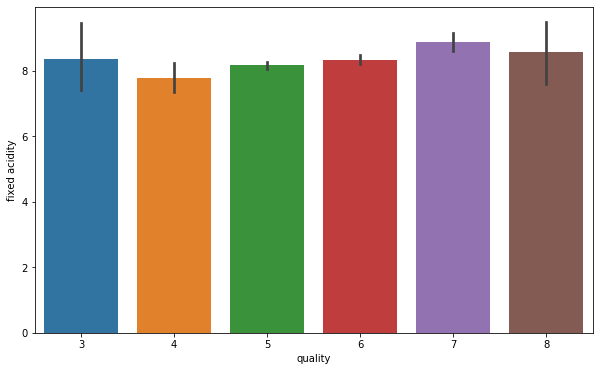

In [10]:
#Fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

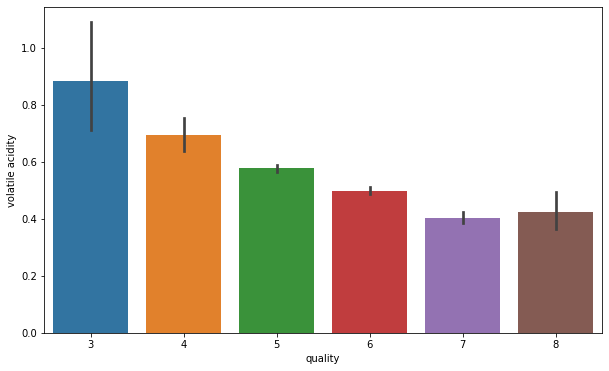

In [11]:
#As quality increases, volatile acidity decreases 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

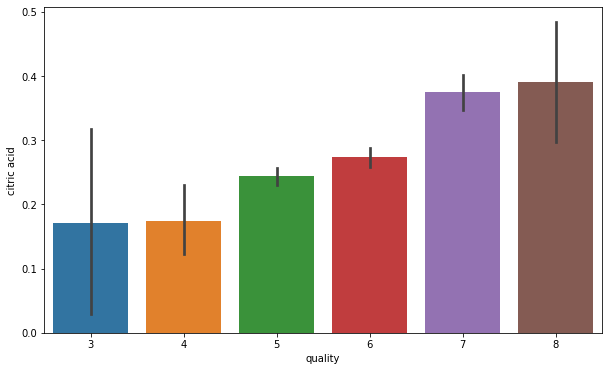

In [12]:
#Citric acid goes higher as quality of the wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

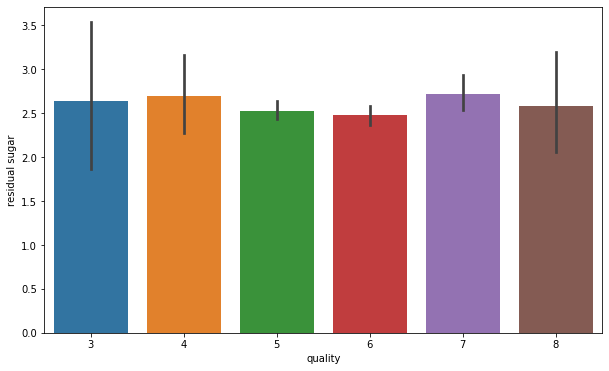

In [13]:
#Residual sugars don't impact much on the quality of wine 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

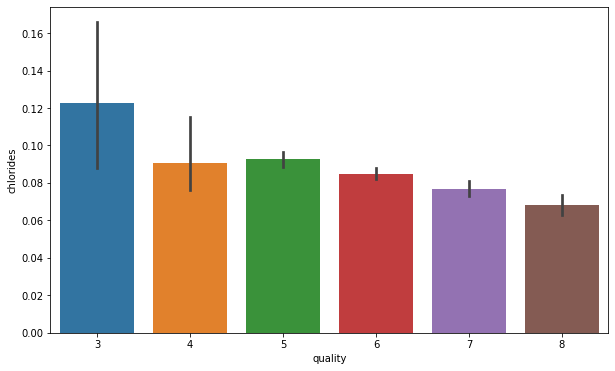

In [14]:
#Composition of chlorides decreases as the quality of the wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

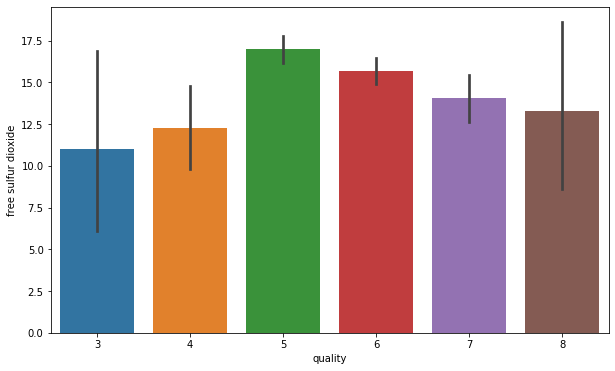

In [15]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

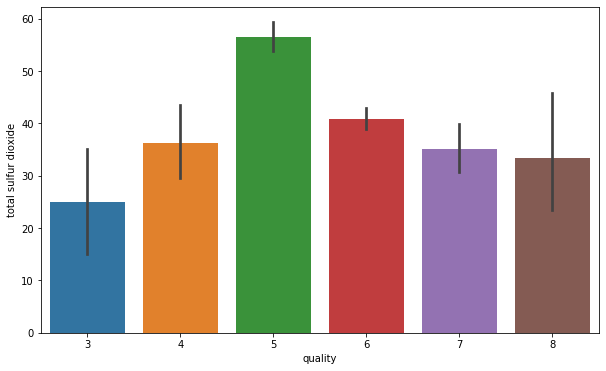

In [16]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

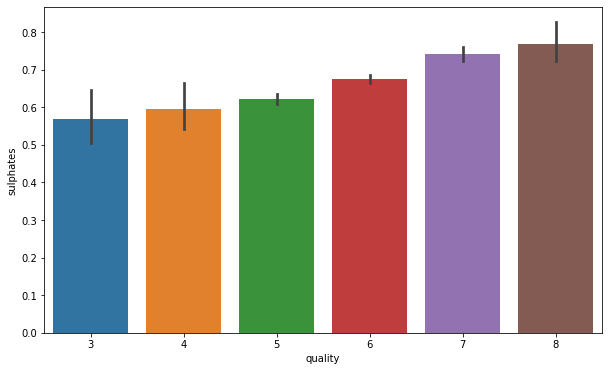

In [17]:
#Sulphates level increases with the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

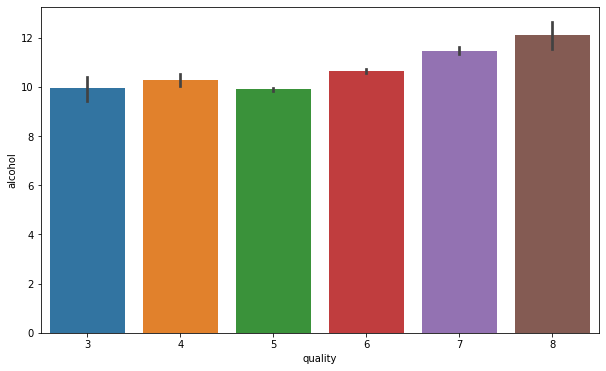

In [18]:
#Alcohol content increases as the quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

In [19]:
#Make classification for the response variable.

#Dividing wine as good and bad by giving the limit for the quality
bins=(2,6.5,8)
group=['Bad','Good']
wine['quality']=pd.cut(wine['quality'],bins=bins,labels=group)

#Assigning labels to our quality variable
label_quality=LabelEncoder()

#Bad becomes 0 and good becomes 1 
wine['quality']=label_quality.fit_transform(wine['quality'])

In [20]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

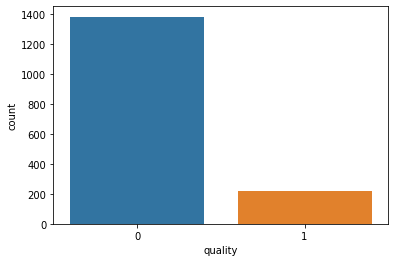

In [21]:
sns.countplot(wine['quality'])

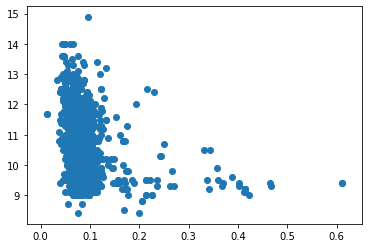

In [22]:
#it is clear that mostly chlorides present in between the alcohol range between 9 to 13 and chloride percentage is 10% to 20%
plt.scatter(wine['chlorides'],wine['alcohol'],cmap='orange')

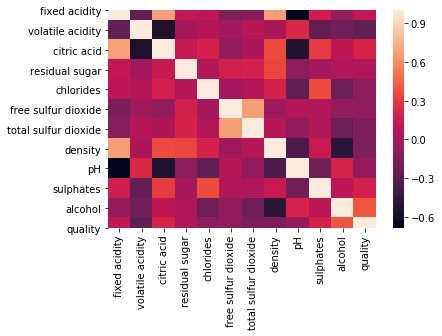

In [23]:
# Check correlation

sns.heatmap(wine.corr())

In [24]:
#Drop pH column
wine.drop('pH',axis=1,inplace=True)

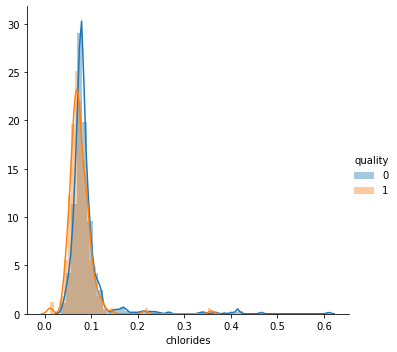

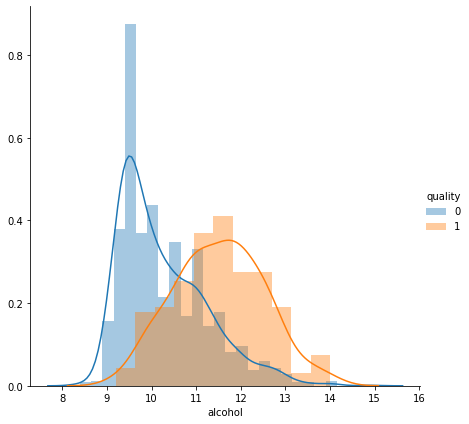

In [25]:
# Distribution plots
sns.FacetGrid(wine,hue='quality',height=5).map(sns.distplot,'chlorides').add_legend()
sns.FacetGrid(wine,hue='quality',height=6).map(sns.distplot,'alcohol').add_legend()

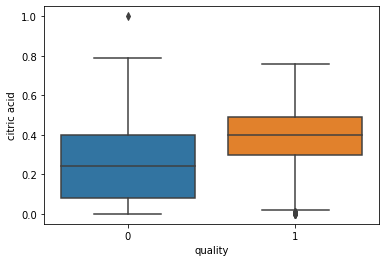

In [26]:
#boxplot for to check outliers
sns.boxplot(x='quality',y='citric acid',data=wine)

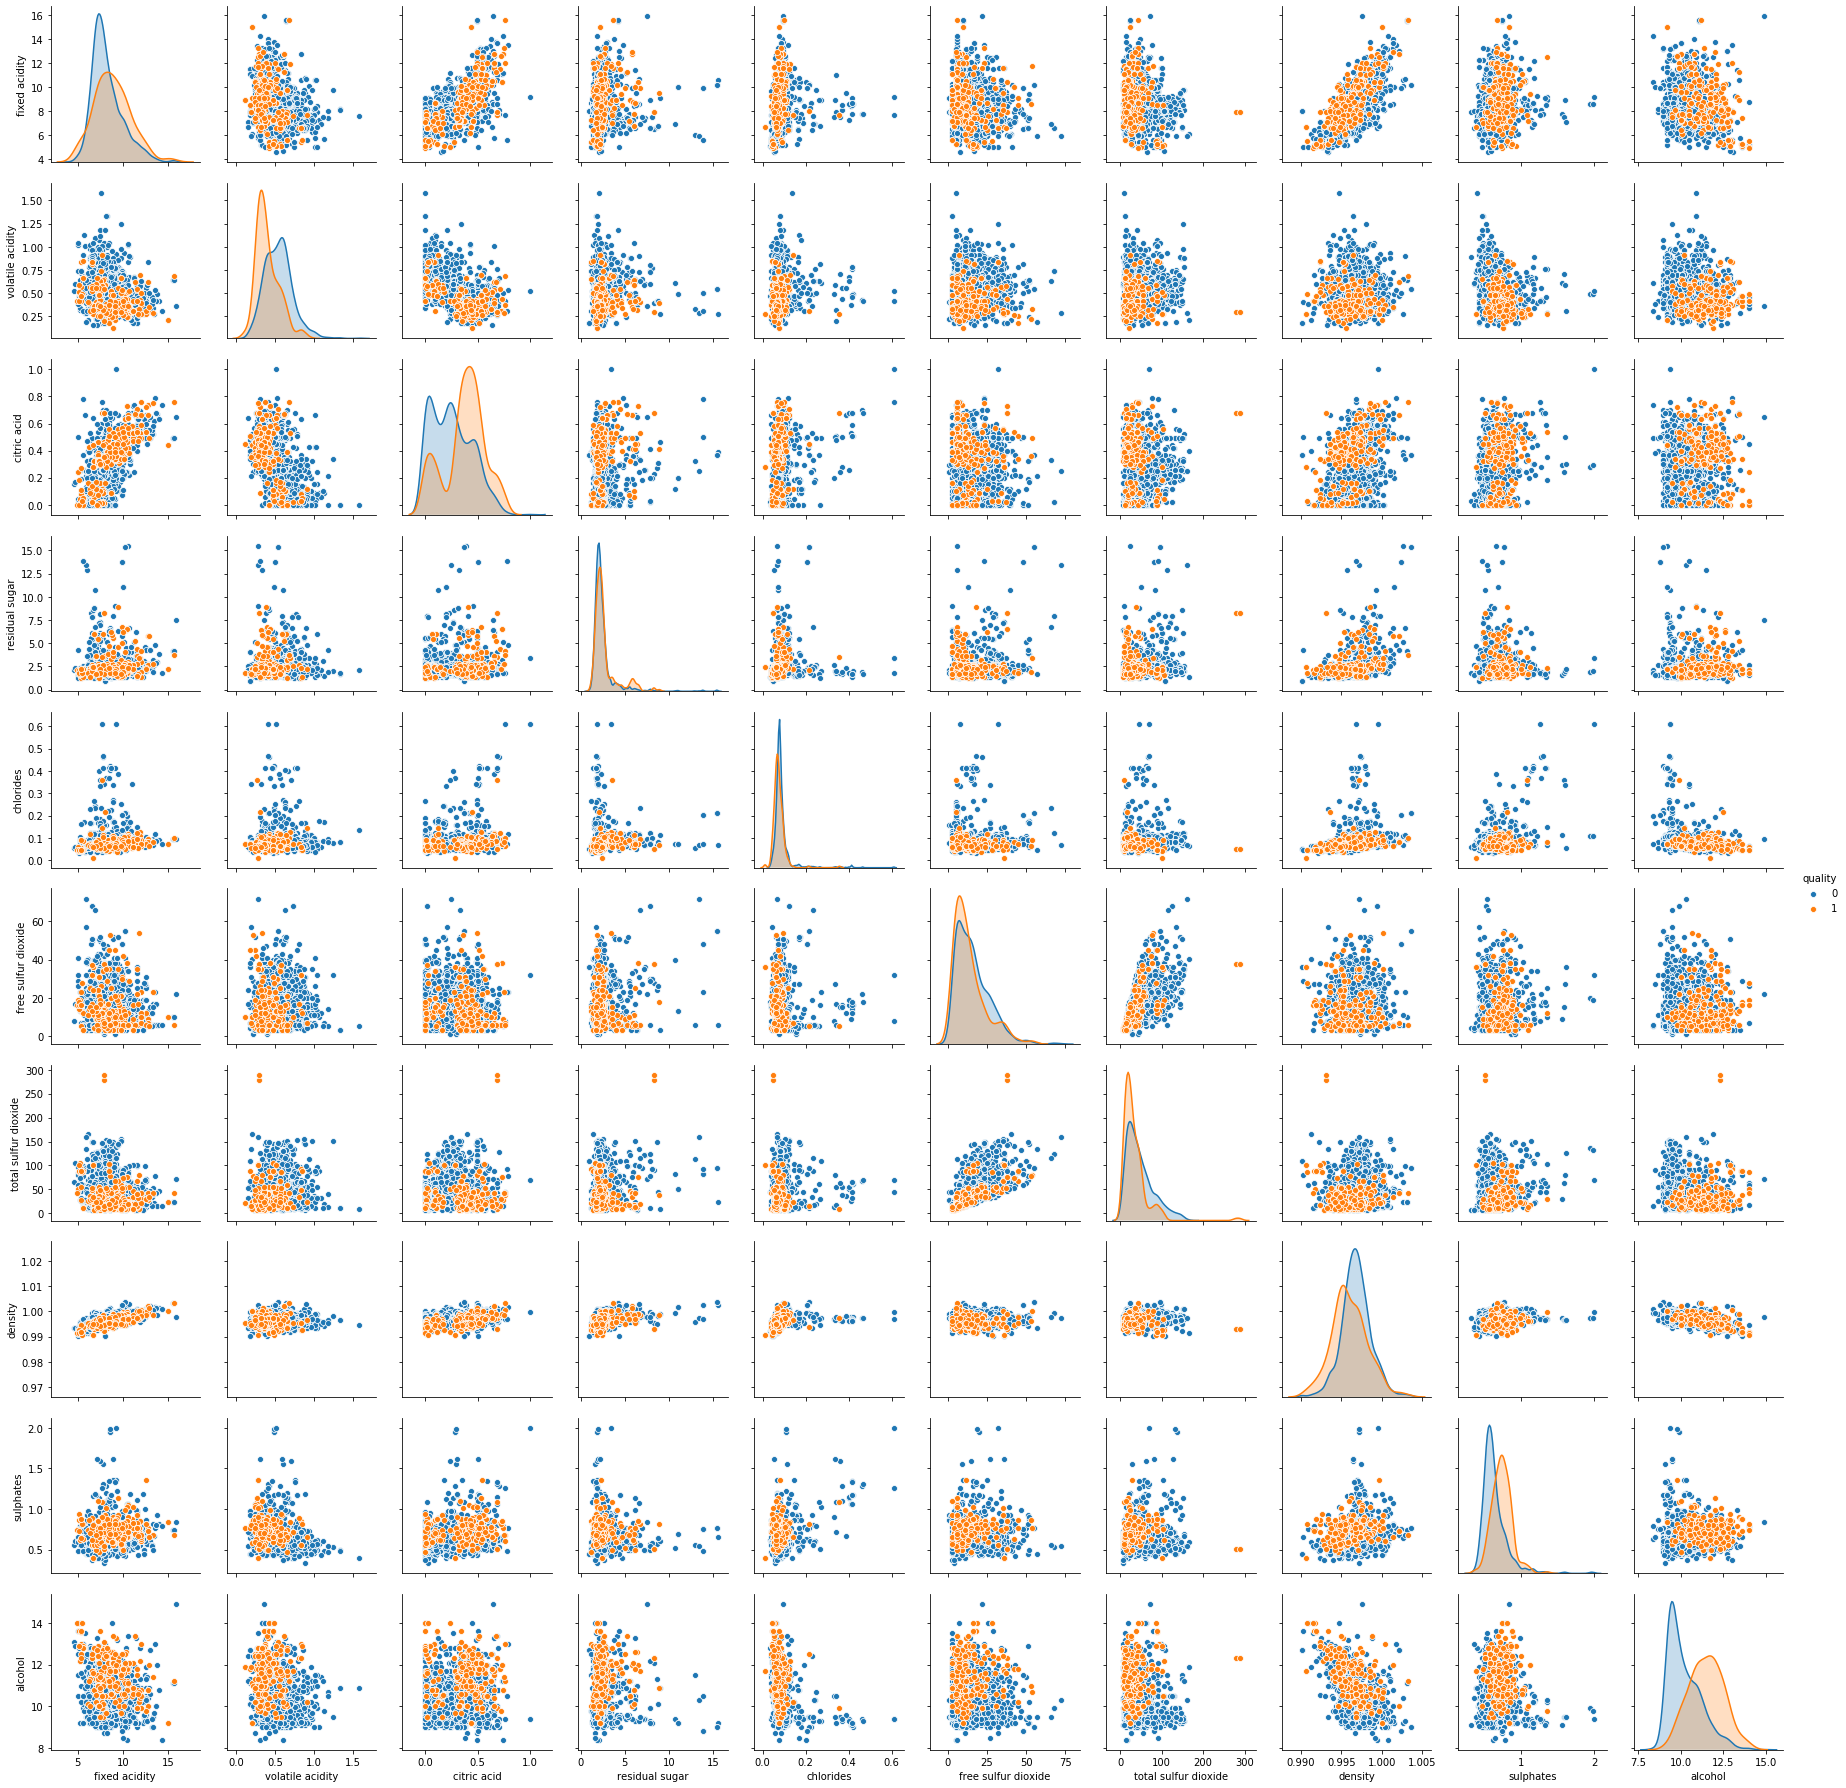

In [27]:
# check correlation
sns.pairplot(wine ,hue ='quality', vars =['fixed acidity','volatile acidity', 'citric acid', 'residual sugar',
 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
 'sulphates', 'alcohol'])

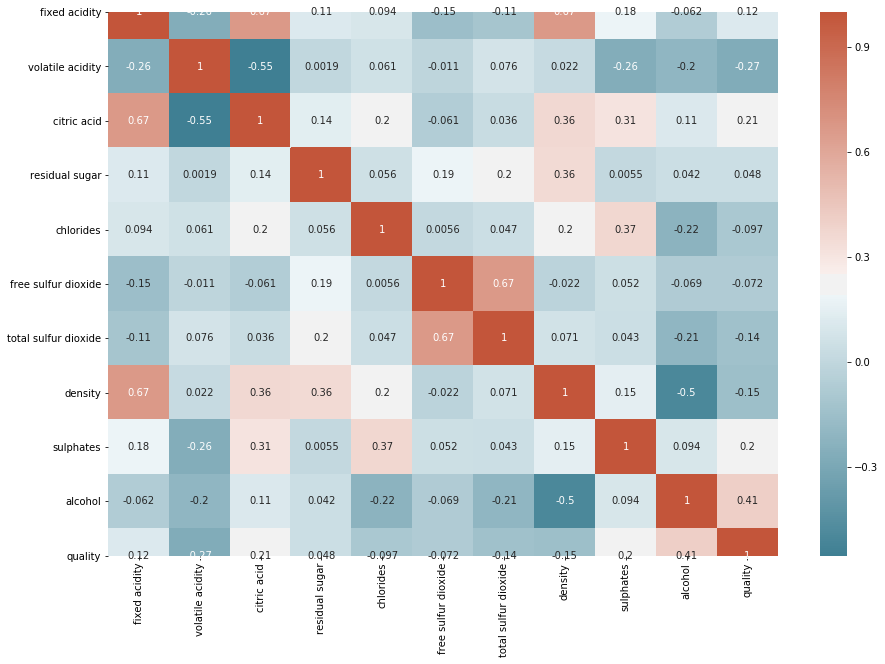

In [28]:
# heat map to view correlated values
corr = wine.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

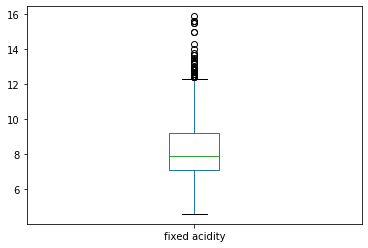

In [29]:
#Identification and Removal of Outliers
#  we can observe that there is a lot of outliers present .
wine['fixed acidity'].plot.box()

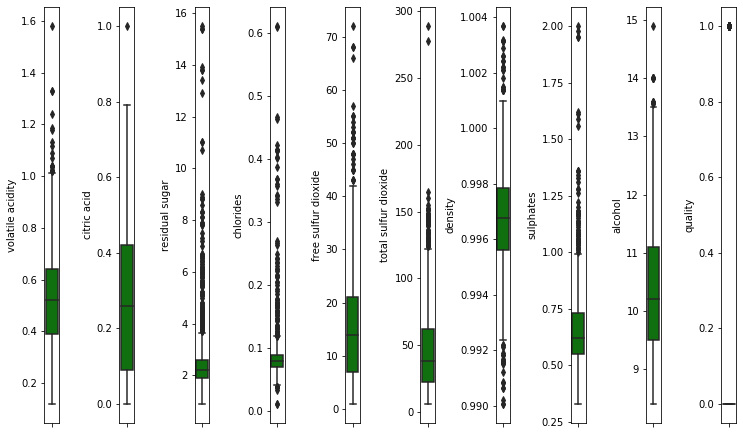

In [30]:
#There are lots of outliers present and need to be removed those outliers
collist=wine.columns.values
ncol=12
nrows=10
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
 plt.subplot(nrows,ncol,i+1)
 sns.boxplot(wine[collist[i]],color='green',orient='v')
 plt.tight_layout()

In [31]:
#Removing Outliers
from scipy.stats import zscore
z=np.abs(zscore(wine))
z
threshold=3
np.where(z>3)

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          57,   81,   81,   83,   86,   88,   91,   92,  106,  106,  109,
         120,  126,  127,  142,  144,  147,  151,  151,  151,  163,  164,
         169,  169,  181,  199,  226,  226,  240,  243,  244,  258,  258,
         274,  281,  291,  324,  325,  339,  340,  347,  354,  374,  381,
         391,  396,  396,  400,  400,  442,  442,  451,  467,  480,  480,
         494,  515,  544,  554,  554,  555,  555,  557,  557,  568,  584,
         588,  591,  595,  608,  614,  636,  639,  649,  649,  651,  652,
         652,  652,  672,  672,  684,  690,  692,  692,  723,  724,  730,
         754,  776,  777,  795,  821,  836,  837,  889,  911,  917,  923,
         925,  926,  982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079,
        1079, 1081, 1081, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235,
        1244, 1244, 1244, 1260, 1269, 1269, 1270, 1270, 1288, 1289, 1295,
        1296, 1299, 1312, 1319, 1319, 

In [32]:
# View shape
wine_new=wine[(z<3).all(axis=1)]
wine_new.shape

(1465, 11)

In [33]:
# view new data
wine_new.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density  sulphates  alcohol  \
0                 11.0                  34.0   0.9978       0.56      9.4   
1                 25.0                  67.0   0.9968       0.68      9.8   
2                 15.0                  54.0   0.9970       0.65      9.8   
3                 17.0                  60.0   0.9980       0.58      9.8   
4                 11.0                  34.0   0.9978       0.56      9.4   

   quality  
0        0  
1        0  
2        0  
3        0  
4        0

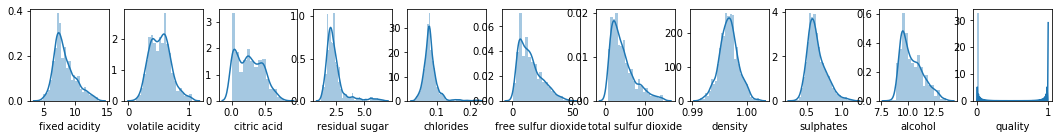

In [34]:
#Distribution of Skewness
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
 plt.subplot(nrows,ncol,i+1)
 sns.distplot(wine_new[collist[i]])

In [35]:
#Density and Sulphates and fixed acidity are normally distributed .
wine_new.skew()

fixed acidity           0.791266
volatile acidity        0.388565
citric acid             0.297122
residual sugar          2.447710
chlorides               2.273578
free sulfur dioxide     0.869022
total sulfur dioxide    1.182257
density                 0.037632
sulphates               0.898820
alcohol                 0.753354
quality                 2.102728
dtype: float64

In [36]:
#we can see x and y, y is the target varible and quality feature is assigned to y and all other features 
#are assigned to x..
x=wine_new.iloc[:,:-1]
y=wine_new.iloc[:,-1]

In [37]:
#removal of skew-ness using log function
for col in x.columns:
 if x.skew().loc[col]>0.55:
     x[col]=np.log1p(x[col])

In [38]:
#only density data is normally distributed
#other independent variables are right skewed or positively skewed
x.skew()

fixed acidity           0.373105
volatile acidity        0.388565
citric acid             0.297122
residual sugar          1.529624
chlorides               2.073173
free sulfur dioxide    -0.168821
total sulfur dioxide   -0.056102
density                 0.037632
sulphates               0.674739
alcohol                 0.600066
dtype: float64

# Building a Machine Learning Model

In [39]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)

In [40]:
#Applying Standard Scaling to get optimized result
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [41]:
#Applying Machine Learning Algorithms
lg=LogisticRegression()
gnb = GaussianNB()

#prepare models
models=[]
models.append(('LogisticRegression',lg))
models.append(('Naive Bayes',gnb))

#evaluate each model
Model=[]
cvs=[]
score=[]
rocscore=[]
for name,model in models:
 print('**************',name,'***********')
 print('\n')
 Model.append(name)
 model.fit(x_train,y_train)
 print(model)
 predictions=model.predict(x_test)
 print('\n')
 acc=accuracy_score(y_test,pred)
 print('accuracy score',acc)
 score.append(acc*100)
 cv=model_selection.cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
 print('Cross-val-score=',cv)
 cvs.append(cv*100)
 print('\n')
 false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)
 roc_auc=roc_auc_score(y_test,pred)
 print('roc_auc_score',roc_auc)
 rocscore.append(roc_auc*100)
 print('\n')
 print(classification_report(y_test,pred))
 print('\n')
 cm=confusion_matrix(y_test,pred)
 print(cm)
 print('\n')
 plt.figure(figsize=(10,15))
 plt.subplot(911)
 plt.title(name)
 print(sns.heatmap(cm,annot=True))
 plt.subplot(912)
 plt.title(name)
 plt.plot(false_positive_rate,true_positive_rate,label='AUC'%roc_auc)
 plt.plot([0,1],[0,1],'k--')
 plt.xlabel('false_positive_rate')
 plt.ylabel('true_positive_rate')
 plt.show()

************** LogisticRegression ***********


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)




C:\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



NameError: name 'pred' is not defined

In [ ]:
#Show Mean Absolute Error, Mean Squared Error & Root Mean Squared Error 
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [ ]:
print(lg.intercept_)

In [ ]:
# Show R squared value for regression
print('R squared value: ',lg.score(x_train,y_train))

In [ ]:
# Correlation
print('Correlation: ', math.sqrt(lg.score(x_train,y_train)))

In [ ]:
#Predicting Values Logistic Regression
lg.fit(x_train,y_train)
predictions=lg.predict(x_test)
print('predicted :',pred)
print('actual',y_test)

In [ ]:
predictions = lg.predict(x_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

# Saving Model

In [ ]:
# Save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

#use the loaded model to make prediction
result = loaded_model.predict(x_test)
result_accuracy = loaded_model.score(x_test, y_test)

print(result)
print(result_accuracy)

In [ ]:
#save model using joblib
from sklearn.externals import joblib

#save the model in a file
joblib.dump(rfc,'quality of wine.obj')

#load the model from a file
lg_from_joblib=joblib.load('quality of wine.obj')

#use the loaded model to make prediction
lg_from_joblib.predict(x_test)